In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [5]:
print("train data :", "images :", x_img_train.shape, "labels :", y_label_train.shape)
print(" test data :", "images :", x_img_test.shape, "labels :", y_label_test.shape)

train data : images : (50000, 32, 32, 3) labels : (50000, 1)
 test data : images : (10000, 32, 32, 3) labels : (10000, 1)


In [6]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [9]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [12]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Conv2D(filters=256, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 作業:
## 請分別選用 "MSE", "binary _crossentropy" 查看Train/test accurancy and loss rate

In [45]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [46]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 39s 1ms/step - loss: 1.1889 - accuracy: 0.7289 - val_loss: 1.0789 - val_accuracy: 0.6999
Epoch 2/12
37500/37500 [==============================] - 43s 1ms/step - loss: 0.2465 - accuracy: 0.9146 - val_loss: 1.2011 - val_accuracy: 0.7081
Epoch 3/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.1544 - accuracy: 0.9463 - val_loss: 1.2166 - val_accuracy: 0.7127
Epoch 4/12
37500/37500 [==============================] - 50s 1ms/step - loss: 0.0977 - accuracy: 0.9673 - val_loss: 1.2932 - val_accuracy: 0.7208
Epoch 5/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0697 - accuracy: 0.9774 - val_loss: 1.3976 - val_accuracy: 0.7184
Epoch 6/12
37500/37500 [==============================] - 54s 1ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 1.4621 - val_accuracy: 0.7258
Epoch 7/12
37500/37500 [==============================] - 54s 1ms/st

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation) :
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

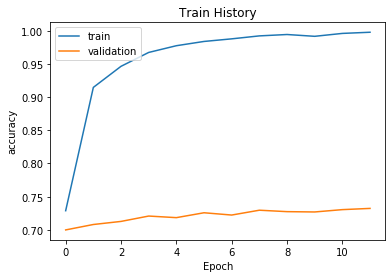

In [48]:
show_train_history(train_history, 'accuracy','val_accuracy')

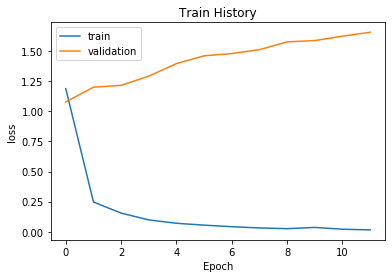

In [49]:
show_train_history(train_history, 'loss', 'val_loss')

In [29]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 44s 1ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.1860 - val_accuracy: 0.9493
Epoch 2/12
37500/37500 [==============================] - 48s 1ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.1901 - val_accuracy: 0.9494
Epoch 3/12
37500/37500 [==============================] - 52s 1ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.1932 - val_accuracy: 0.9492
Epoch 4/12
37500/37500 [==============================] - 54s 1ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.1942 - val_accuracy: 0.9495
Epoch 5/12
37500/37500 [==============================] - 55s 1ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.1960 - val_accuracy: 0.9493
Epoch 6/12
37500/37500 [==============================] - 56s 1ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.1987 - val_accuracy: 0.9497
Epoch 7/12
37500/37500 [==============================] - 56s 1ms/st

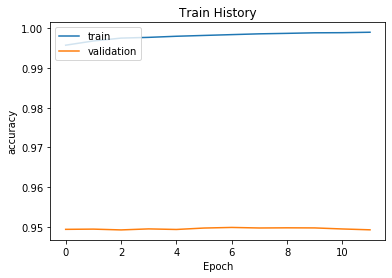

In [43]:
show_train_history(train_history, 'accuracy','val_accuracy')

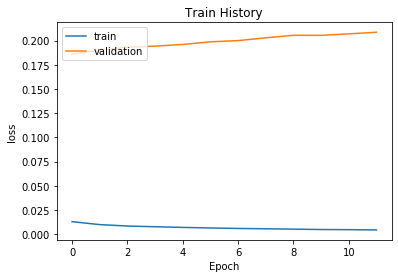

In [44]:
show_train_history(train_history, 'loss', 'val_loss')

In [50]:
model.compile(loss='MSE', 
              optimizer='sgd', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 42s 1ms/step - loss: 2.9784e-04 - accuracy: 0.9988 - val_loss: 0.0458 - val_accuracy: 0.7315
Epoch 2/12
37500/37500 [==============================] - 47s 1ms/step - loss: 2.6882e-04 - accuracy: 0.9989 - val_loss: 0.0458 - val_accuracy: 0.7309
Epoch 3/12
37500/37500 [==============================] - 51s 1ms/step - loss: 2.5827e-04 - accuracy: 0.9991 - val_loss: 0.0457 - val_accuracy: 0.7314
Epoch 4/12
37500/37500 [==============================] - 52s 1ms/step - loss: 2.5082e-04 - accuracy: 0.9992 - val_loss: 0.0458 - val_accuracy: 0.7310
Epoch 5/12
37500/37500 [==============================] - 54s 1ms/step - loss: 2.4510e-04 - accuracy: 0.9992 - val_loss: 0.0458 - val_accuracy: 0.7318
Epoch 6/12
37500/37500 [==============================] - 56s 1ms/step - loss: 2.3889e-04 - accuracy: 0.9992 - val_loss: 0.0458 - val_accuracy: 0.7305
Epoch 7/12
37500/37500 [====================

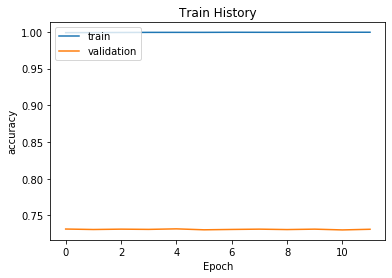

In [51]:
show_train_history(train_history, 'accuracy','val_accuracy')

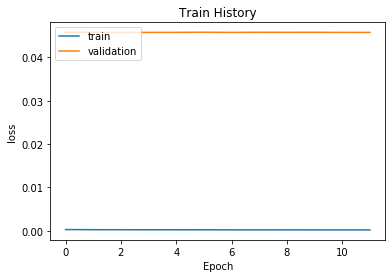

In [52]:
show_train_history(train_history, 'loss', 'val_loss')

## 結論 : 以categorical_crossentropy, binary_crossentropy, 以及MSE為損失函數來比較, 前兩者在驗證後期損失值有增高的情形, MSE則呈現穩定的狀態. 不過整體而言, 模型皆存在overfitting的問題.